In [1]:
from rve_utils import get_trainer, viz_latent_space, get_engine_runs, plot_engine_run
from collections import defaultdict
import torch
import random
import matplotlib.pyplot as plt

Model and Trainer from rve_utils:

# FD001

### No reconstruction:

In [8]:
sensors = ['s_3', 's_4', 's_7', 's_11', 's_12'] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD001", sensors, reconstruct=False)

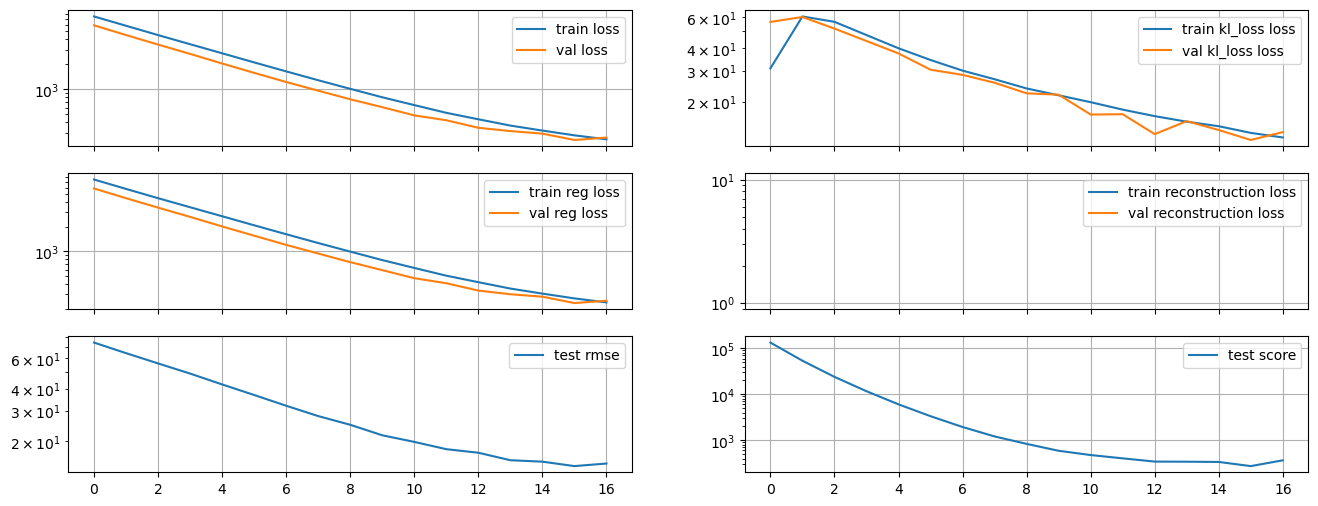

Epoch:17 
Train loss: 251.03 kl loss: 12.59 reg loss: 238.44 recon loss: 0.0
Valid loss: 263.24 kl loss: 13.49 reg loss: 249.74 recon loss: 0.0
Test:
     RMSE: 14.88      Score: 366.16
Best RMSE: 14.38 Best score: 274.02


In [9]:
trainer.train(17)

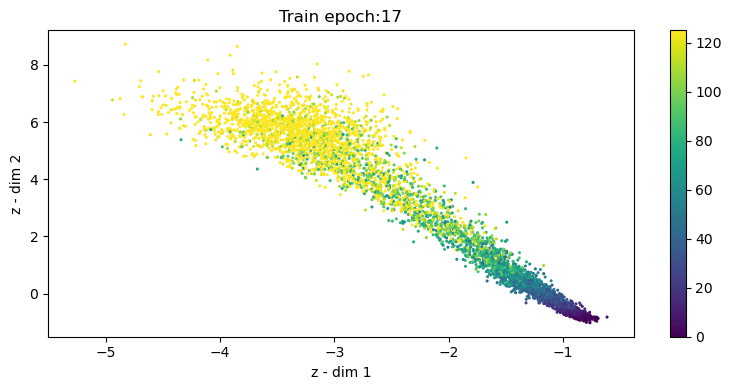

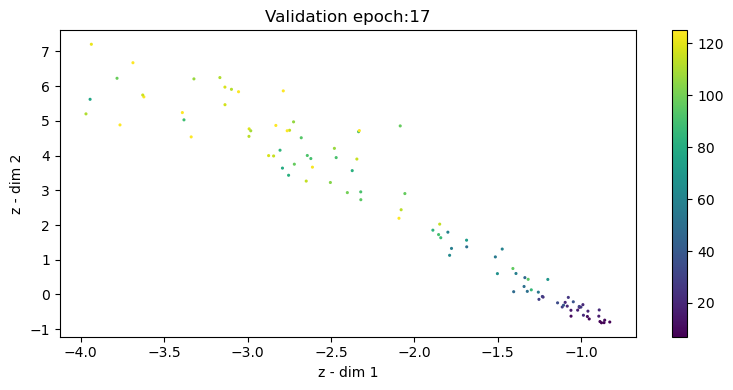

In [10]:
epoch = trainer.epochs
model = trainer.model

viz_latent_space(model, x_train[::3], y_train[::3], title=f'Train epoch:{epoch}')
#viz_latent_space(model, x_val, y_val, title=f'Test epoch:{epoch}')
viz_latent_space(model, x_test, y_test, title=f'Validation epoch:{epoch}')


33


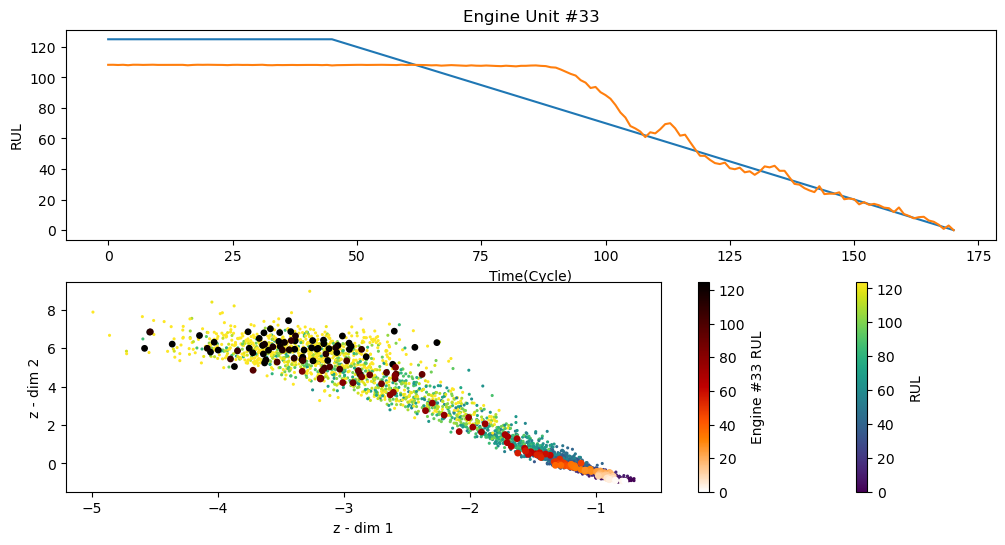

In [11]:
history = get_engine_runs(val_loader, model)
plot_engine_run(history, 33)

22


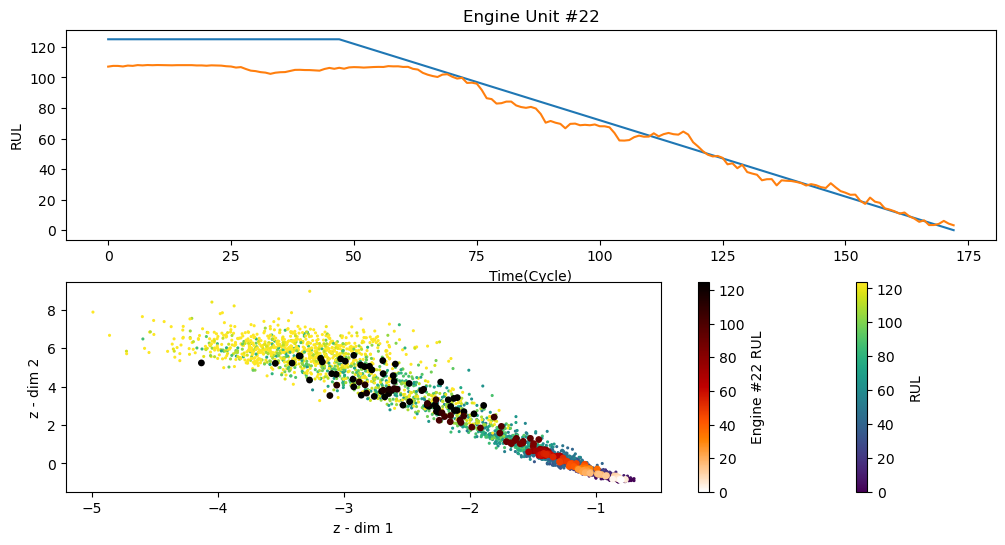

In [16]:
plot_engine_run(history)

### With reconstruction:

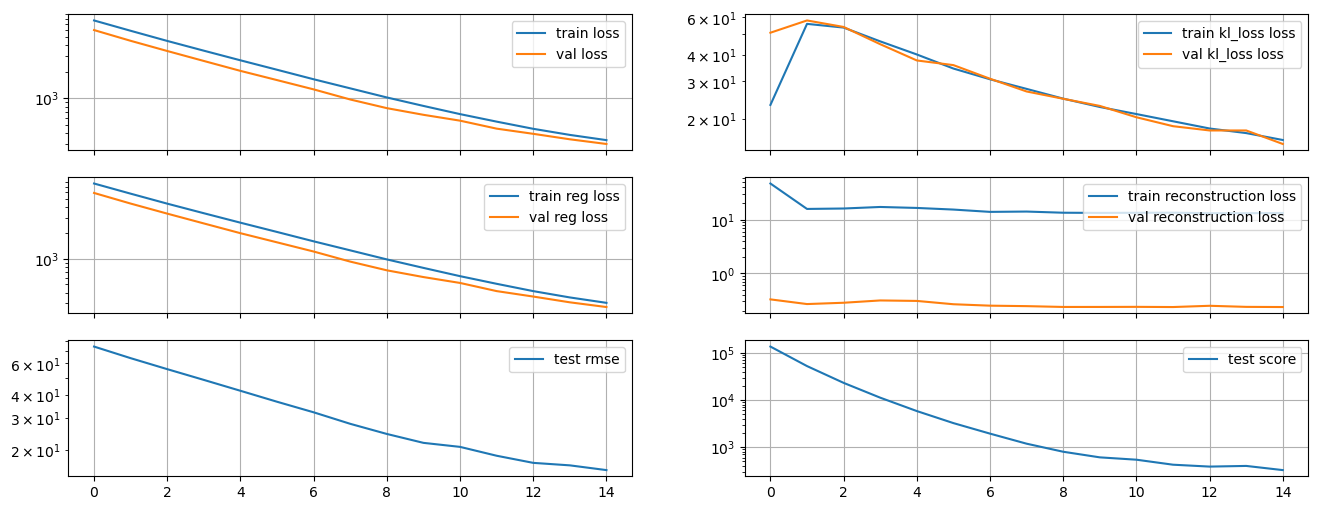

Epoch:15 
Train loss: 331.94 kl loss: 15.9 reg loss: 302.78 recon loss: 13.27
Valid loss: 299.98 kl loss: 15.23 reg loss: 270.33 recon loss: 0.24
Test:
     RMSE: 15.41      Score: 326.31
Best RMSE: 15.41 Best score: 326.31


In [27]:
sensors = ['s_3', 's_4', 's_7', 's_11', 's_12'] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD001", sensors, reconstruct=True)
trainer.train(15)

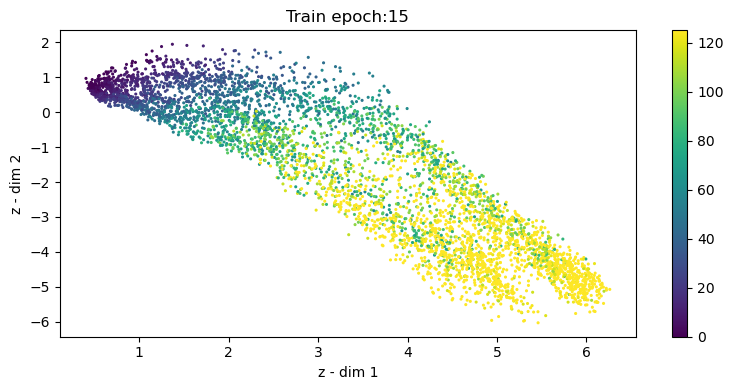

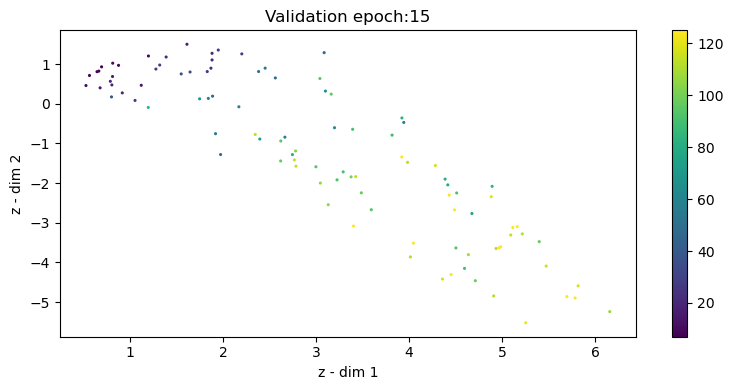

In [28]:
epoch = trainer.epochs
model = trainer.model

viz_latent_space(model, x_train[::3], y_train[::3], title=f'Train epoch:{epoch}')
#viz_latent_space(model, x_val, y_val, title=f'Test epoch:{epoch}')
viz_latent_space(model, x_test, y_test, title=f'Validation epoch:{epoch}')

33


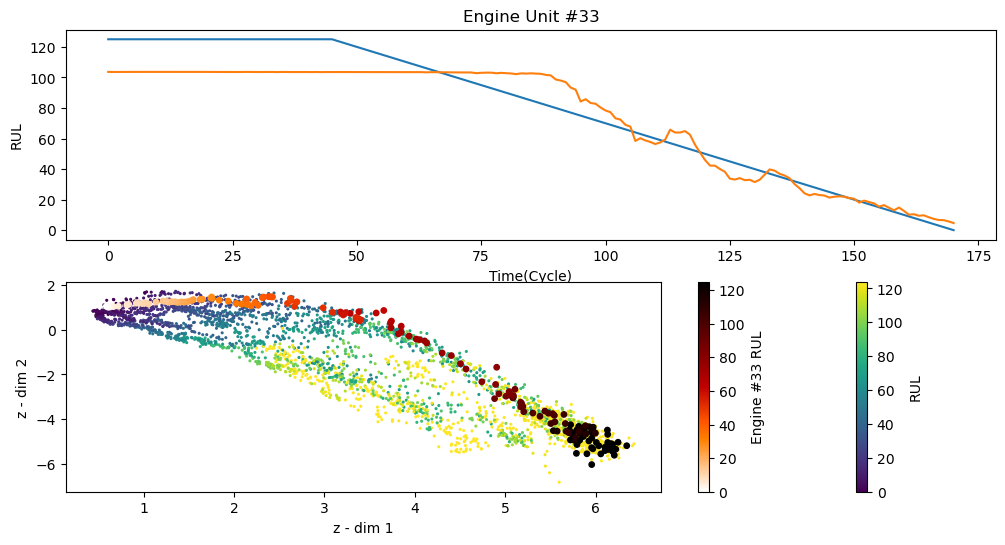

In [29]:
history = get_engine_runs(val_loader, model)
plot_engine_run(history, 33)

53


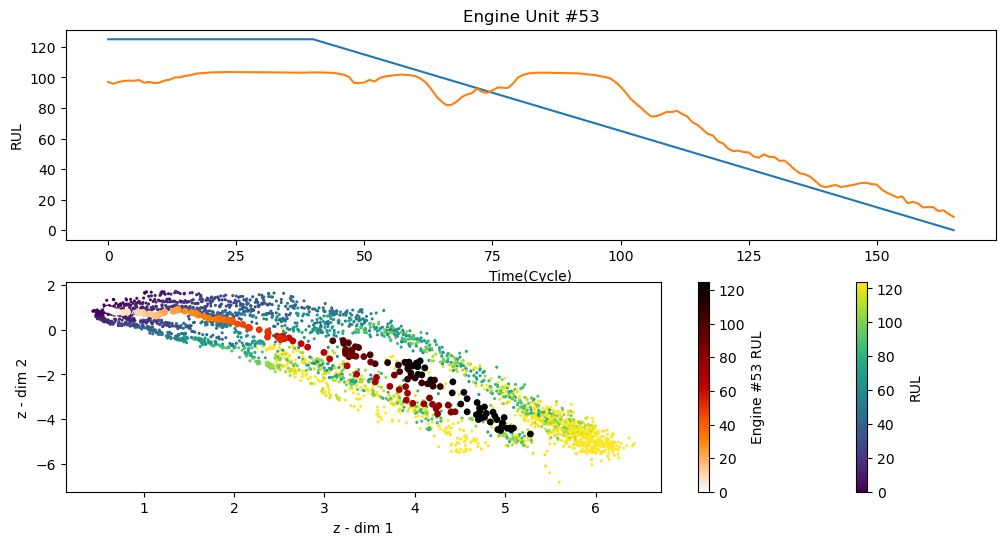

In [30]:
plot_engine_run(history)

12


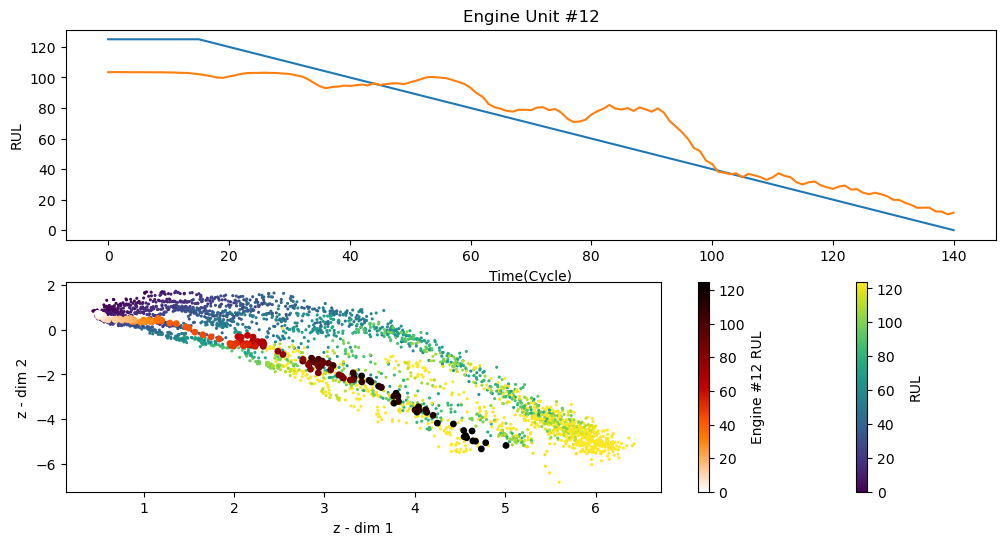

In [35]:
plot_engine_run(history)

# FD003

### No reconstruction:

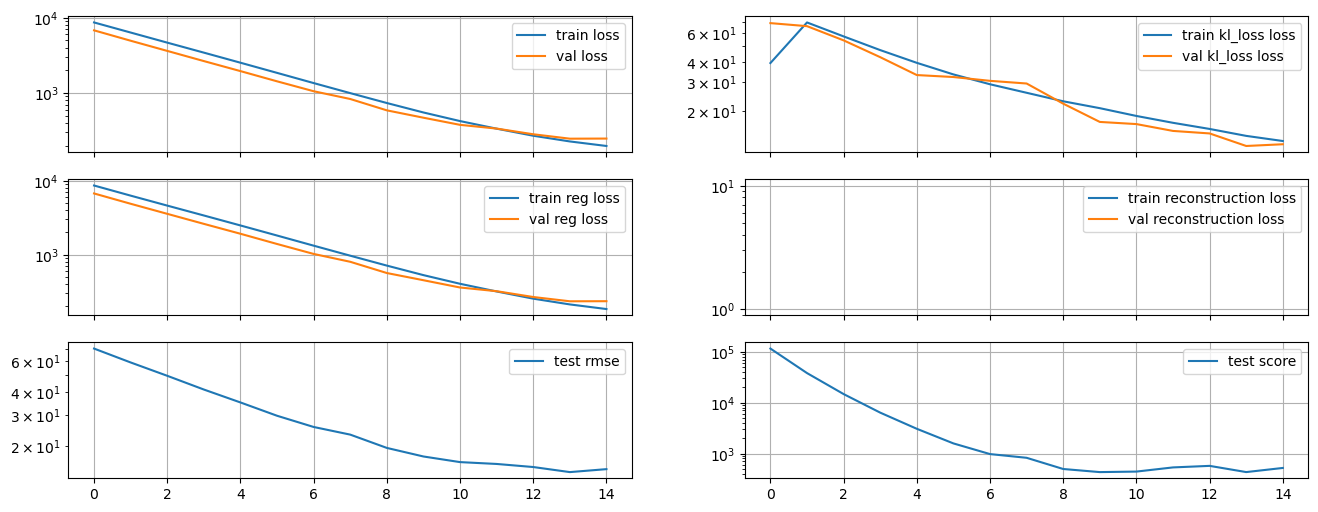

Epoch:15 
Train loss: 197.97 kl loss: 13.18 reg loss: 184.78 recon loss: 0.0
Valid loss: 248.31 kl loss: 12.6 reg loss: 235.71 recon loss: 0.0
Test:
     RMSE: 14.79      Score: 520.24
Best RMSE: 14.24 Best score: 431.24


In [53]:
sensors = ['s_3', 's_4', 's_7', 's_11', 's_12'] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD003", sensors, reconstruct=False)
trainer.train(15)

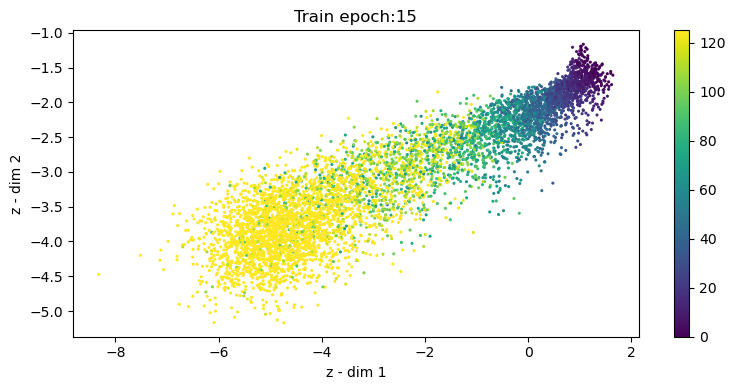

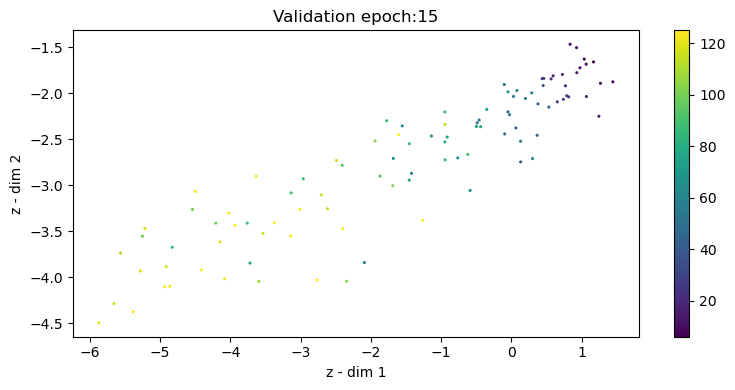

In [54]:
epoch = trainer.epochs
model = trainer.model

viz_latent_space(model, x_train[::3], y_train[::3], title=f'Train epoch:{epoch}')
#viz_latent_space(model, x_val, y_val, title=f'Test epoch:{epoch}')
viz_latent_space(model, x_test, y_test, title=f'Validation epoch:{epoch}')

33


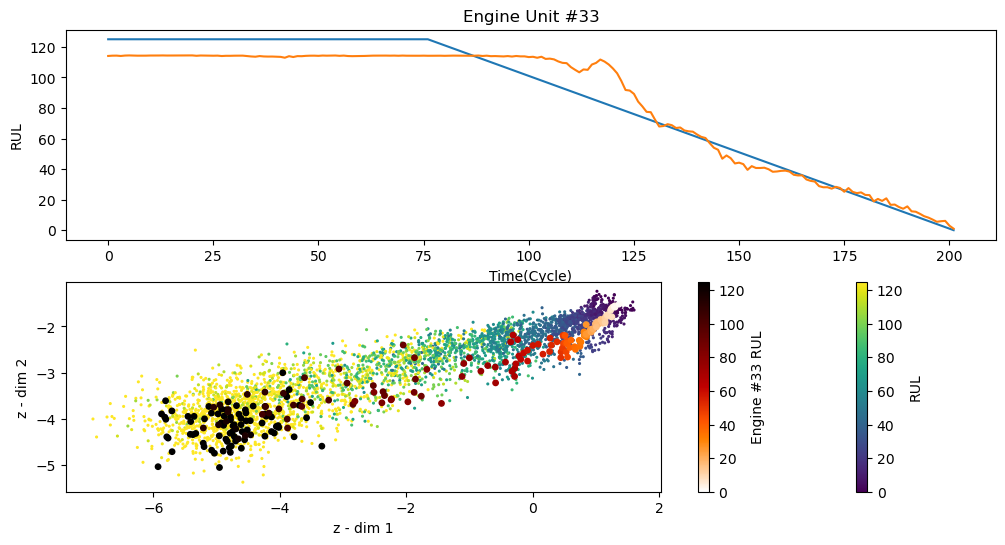

In [55]:
history = get_engine_runs(val_loader, model)
plot_engine_run(history, 33)

44


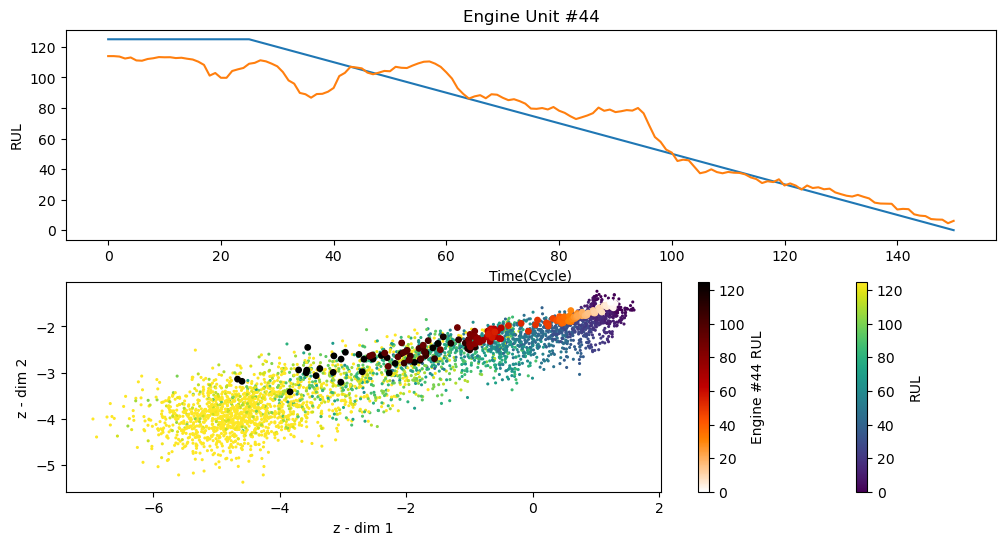

In [58]:
plot_engine_run(history)

### With Reconstruction:

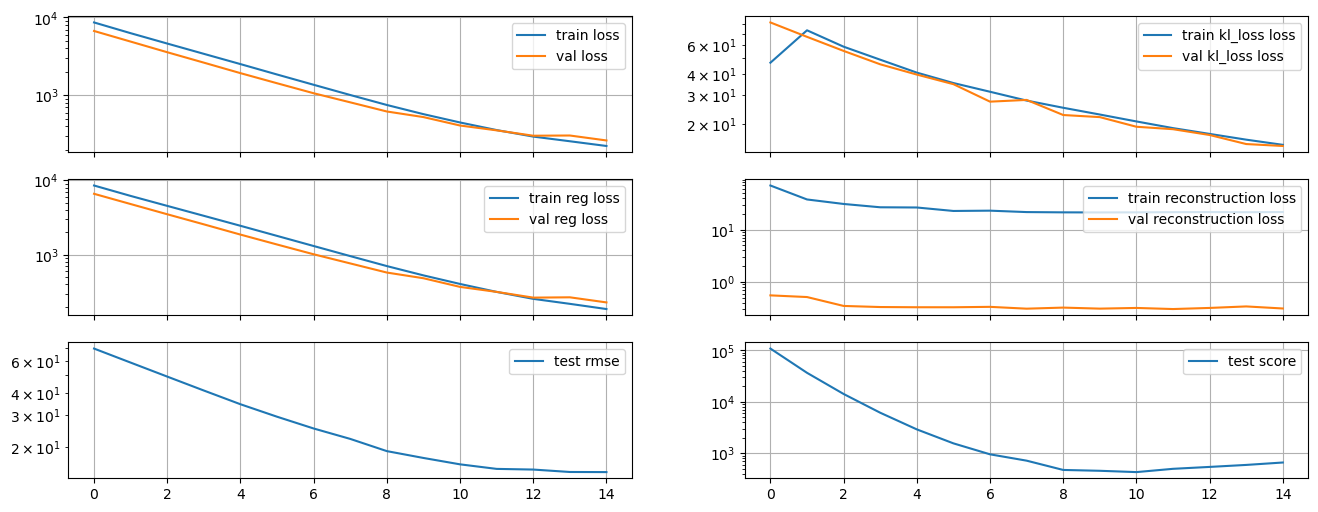

Epoch:15 
Train loss: 223.16 kl loss: 14.92 reg loss: 186.54 recon loss: 21.7
Valid loss: 262.83 kl loss: 14.68 reg loss: 228.97 recon loss: 0.31
Test:
     RMSE: 14.56      Score: 659.26
Best RMSE: 14.56 Best score: 428.99


In [118]:
sensors = ['s_3', 's_4', 's_7', 's_11', 's_12'] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD003", sensors, reconstruct=True)
trainer.train(15)

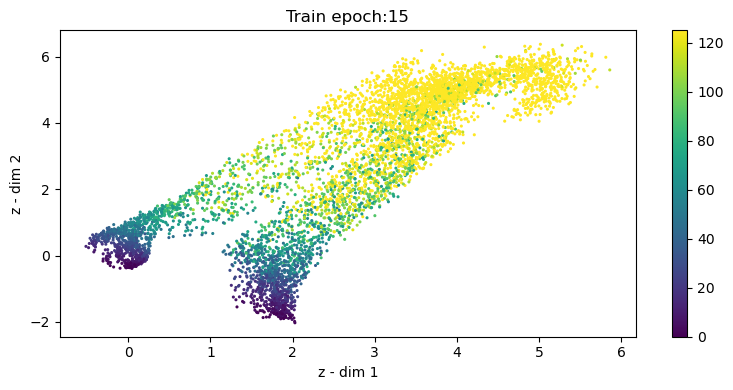

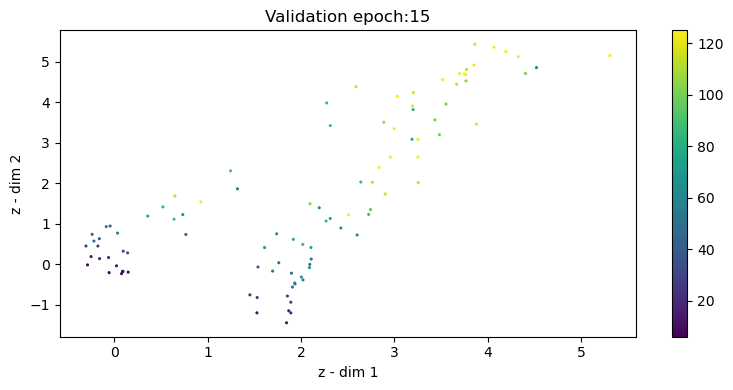

In [136]:
epoch = trainer.epochs
model = trainer.model

viz_latent_space(model, x_train[::3], y_train[::3], title=f'Train epoch:{epoch}')
#viz_latent_space(model, x_val, y_val, title=f'Test epoch:{epoch}')
viz_latent_space(model, x_test, y_test, title=f'Validation epoch:{epoch}')

Engines with first trajectory:

33


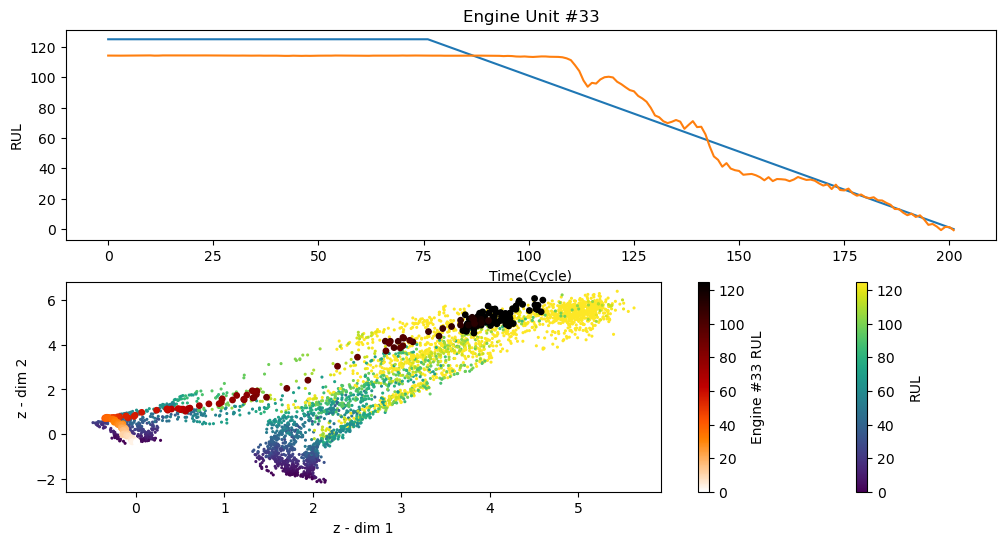

In [120]:
history = get_engine_runs(val_loader, model)
plot_engine_run(history, 33)

73


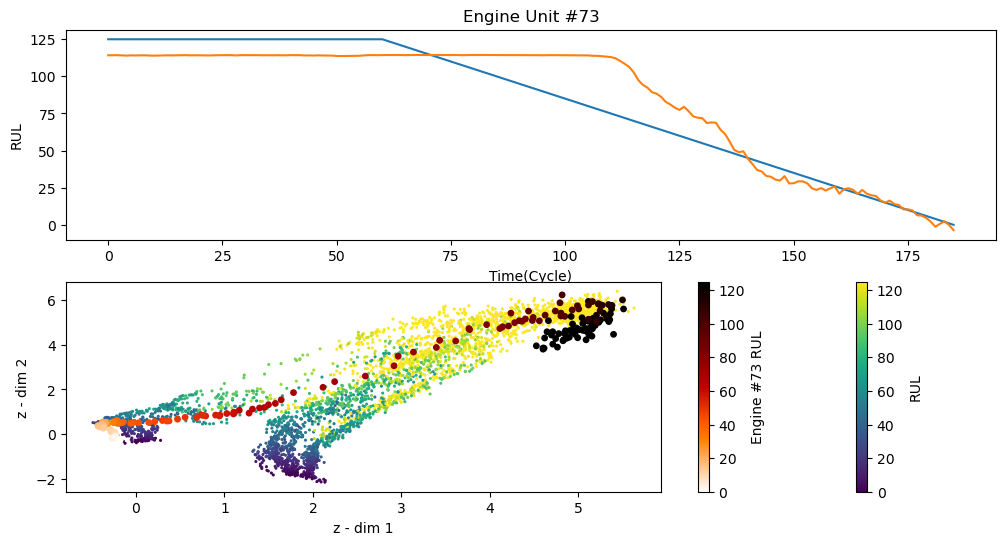

In [220]:
plot_engine_run(history, 73)

45


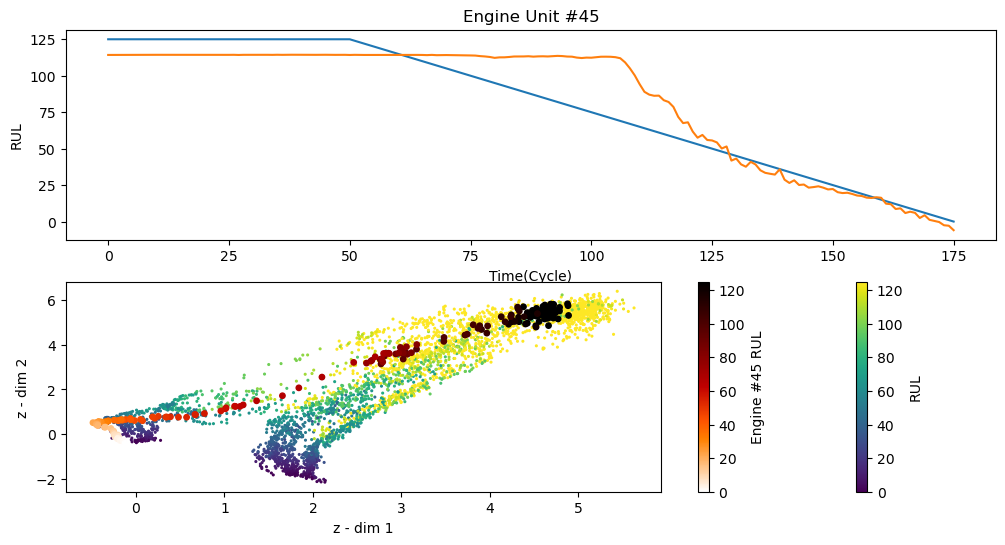

In [235]:
plot_engine_run(history)

Engines with second trajectory:

30


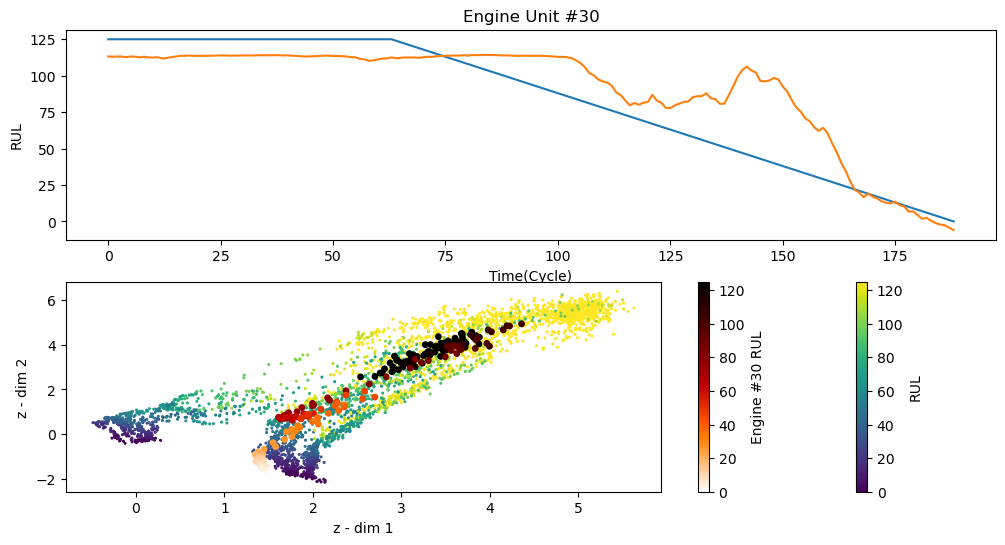

In [221]:
plot_engine_run(history,30)

31


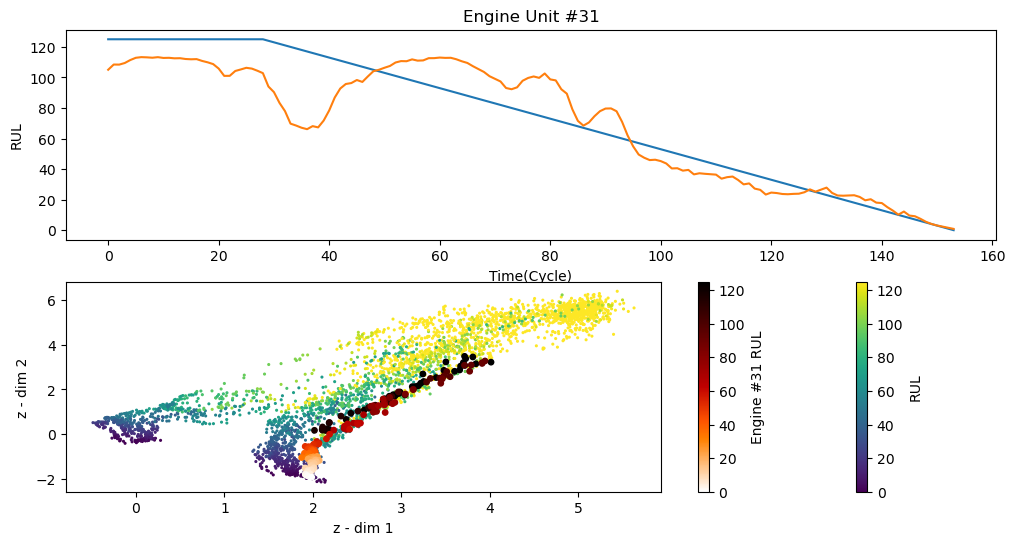

In [222]:
plot_engine_run(history,31)

76


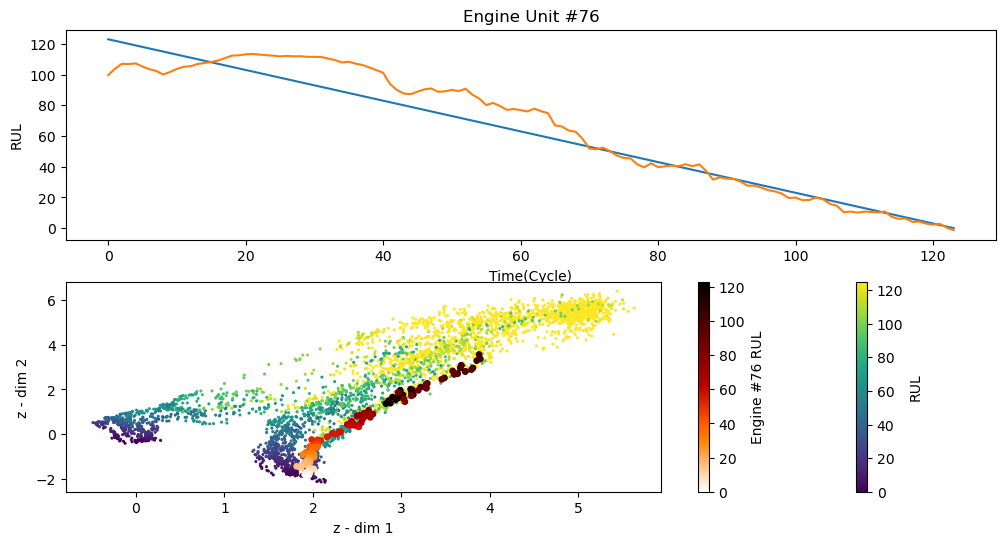

In [223]:
plot_engine_run(history, 76)

1st group: 33, 73, 45
2nd group: 30, 31, 76, 12

In [236]:
import pandas as pd
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i + 1) for i in range(0, 21)]
col_names = index_names + setting_names + sensor_names
# remove unused sensors
drop_sensors = [element for element in sensor_names if element not in sensors]

train_file = './CMAPSSData/train_FD003.txt'

# data readout
train = pd.read_csv(train_file, sep=r'\s+', header=None,names=col_names)
train.drop(drop_sensors,axis=1, inplace=True)
df = train[train["unit_nr"].isin([30, 33,73, 31, 76, 45, 12])]
dff = df.copy()
dff[sensors] = df[sensors].apply(lambda x: (x-x.mean())/x.std())


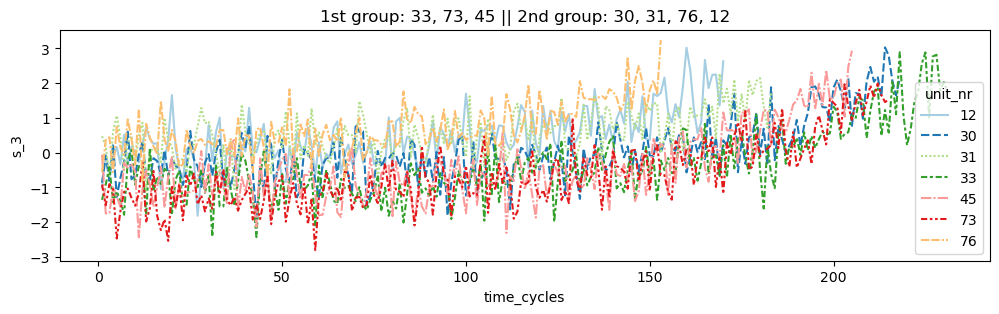

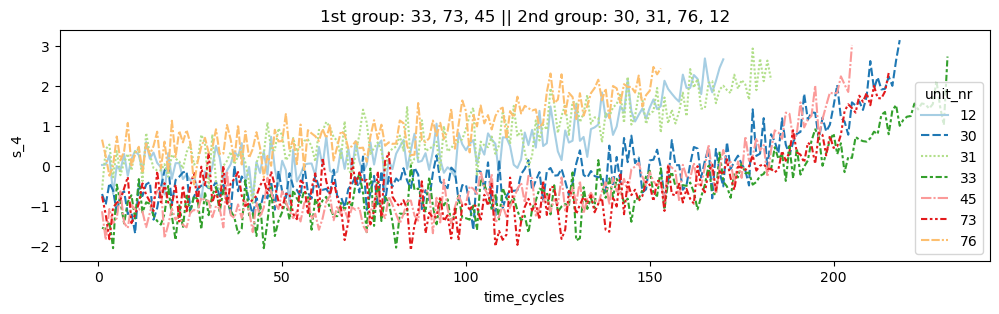

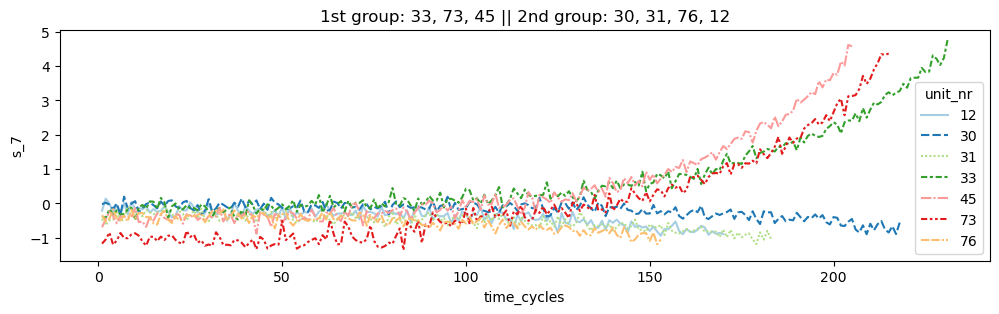

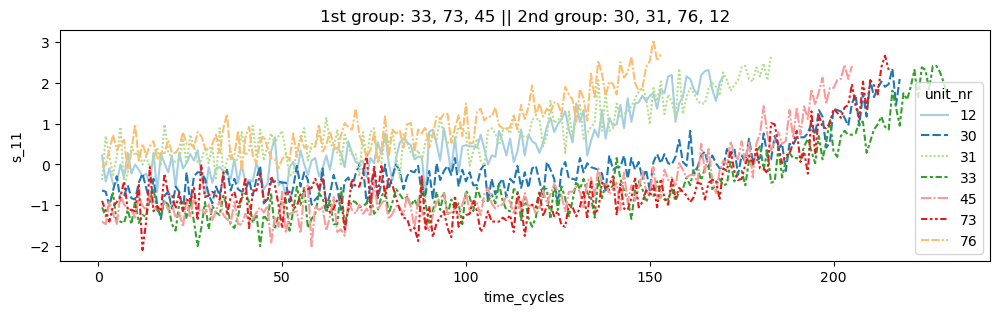

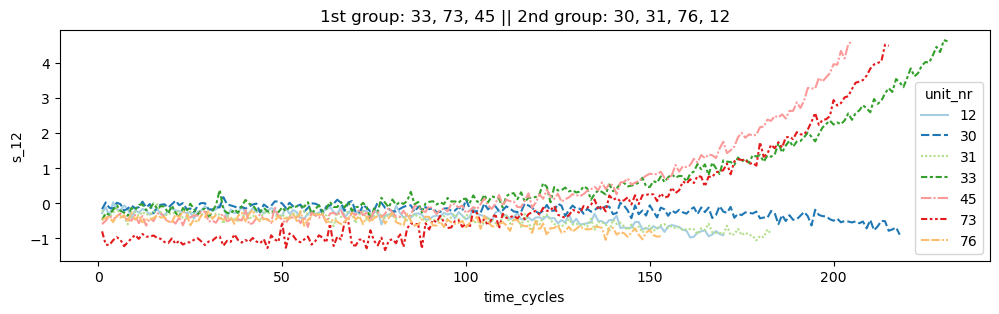

In [253]:
import seaborn as sns
for sensor in sensors:
    plt.figure(figsize=(12,3))
    ax = sns.lineplot(
        data=dff,
        x="time_cycles", y=sensor,
        hue="unit_nr", style="unit_nr", palette="Paired"
    ).set_title('1st group: 33, 73, 45 || 2nd group: 30, 31, 76, 12')
    plt.show()

# Best Score:

## FD001

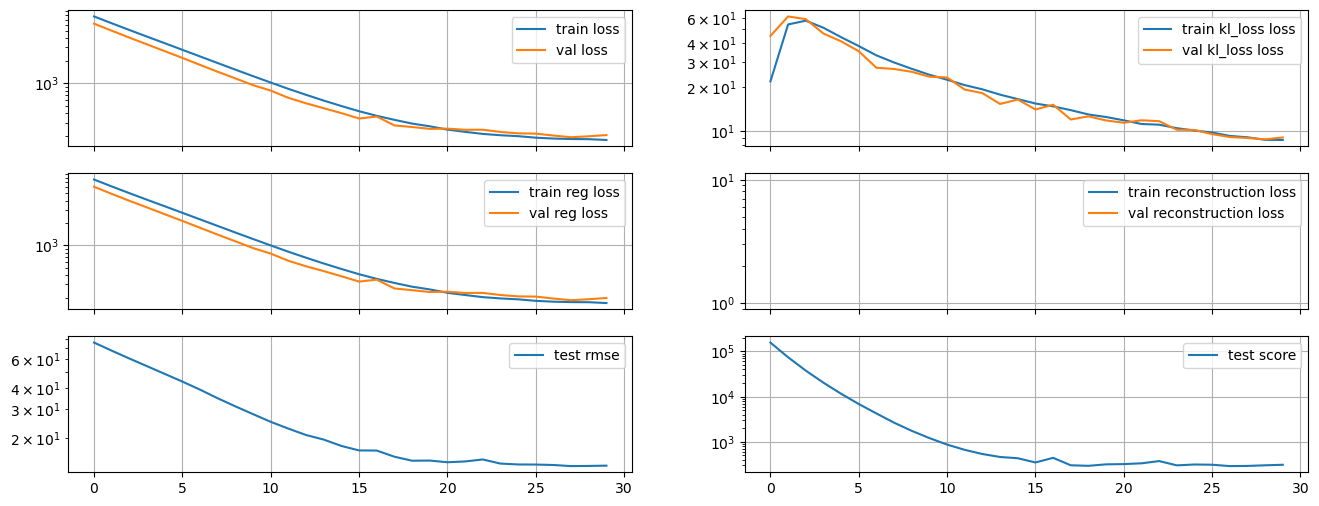

Epoch:30 
Train loss: 177.69 kl loss: 8.69 reg loss: 169.0 recon loss: 0.0
Valid loss: 206.61 kl loss: 9.05 reg loss: 197.57 recon loss: 0.0
Test:
     RMSE: 13.6      Score: 310.55
Best RMSE: 13.52 Best score: 290.07


In [268]:
# sensors to work with: T30, T50, P30, PS30, phi
sensors = ['s_3', 's_4', 's_7', 's_11', 's_12'] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD001", sensors, reconstruct=False, lr=0.0004)
trainer.train(30)

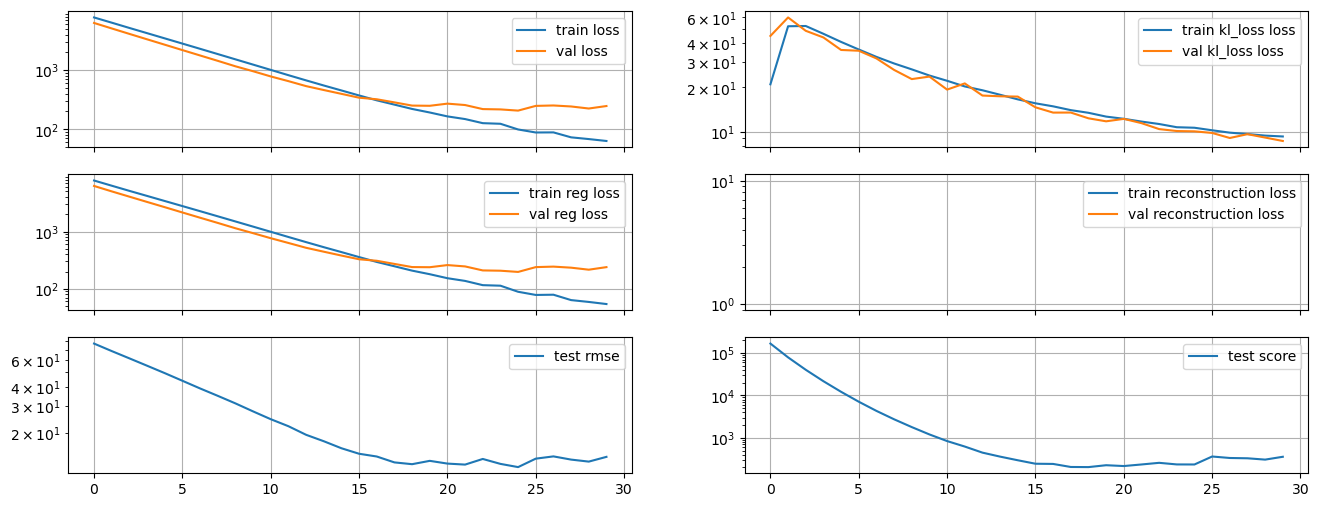

Epoch:30 
Train loss: 63.32 kl loss: 9.26 reg loss: 54.06 recon loss: 0.0
Valid loss: 247.21 kl loss: 8.63 reg loss: 238.58 recon loss: 0.0
Test:
     RMSE: 14.03      Score: 356.42
Best RMSE: 12.03 Best score: 203.33


In [262]:
sensors = [f's_{i}' for i in range(1,22)] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD001", sensors, reconstruct=False, lr=0.0004)
trainer.train(30)

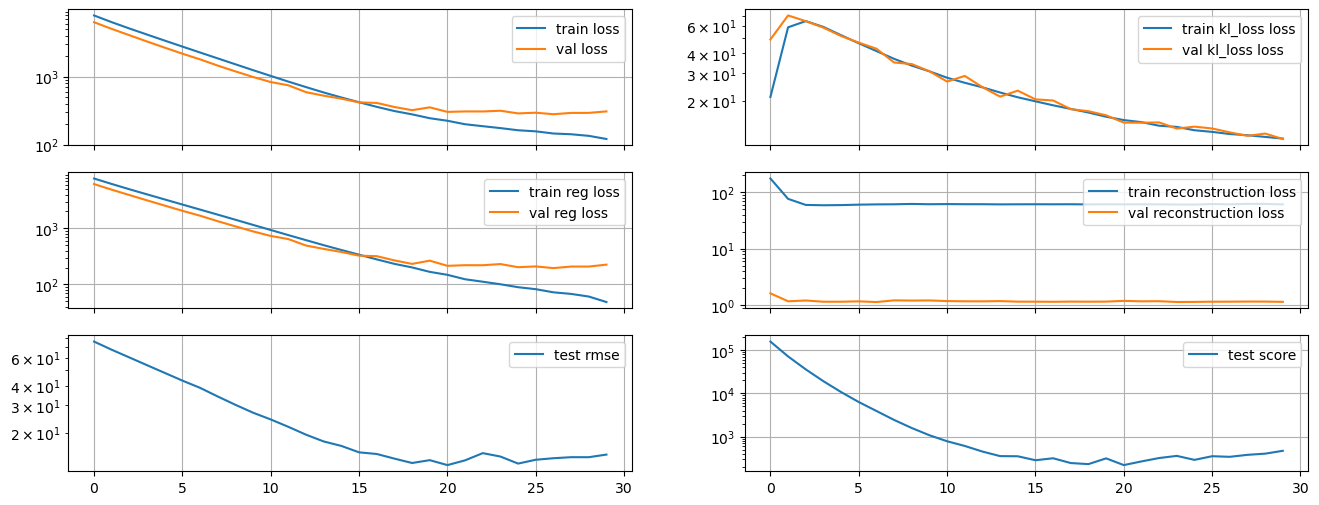

Epoch:30 
Train loss: 121.02 kl loss: 11.41 reg loss: 48.49 recon loss: 61.12
Valid loss: 307.96 kl loss: 11.35 reg loss: 225.25 recon loss: 1.15
Test:
     RMSE: 14.58      Score: 470.86
Best RMSE: 12.5 Best score: 219.69


In [263]:
sensors = [f's_{i}' for i in range(1,22)] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD001", sensors, reconstruct=True, lr=0.0004)
trainer.train(30)

## FD003

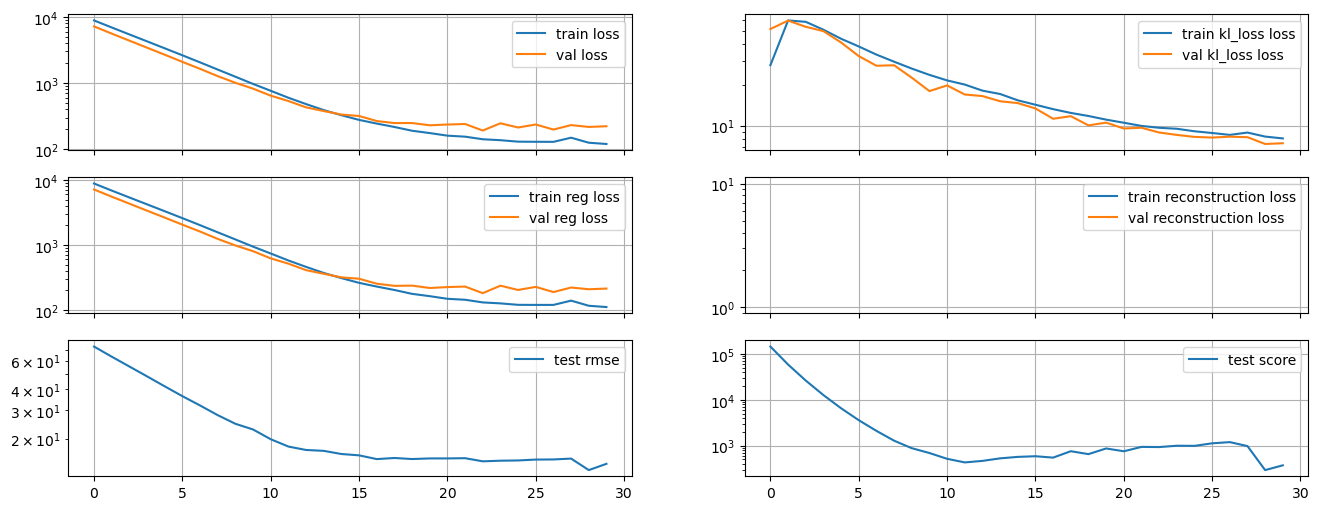

Epoch:30 
Train loss: 119.38 kl loss: 8.04 reg loss: 111.35 recon loss: 0.0
Valid loss: 221.44 kl loss: 7.4 reg loss: 214.03 recon loss: 0.0
Test:
     RMSE: 14.07      Score: 371.48
Best RMSE: 12.88 Best score: 292.14


In [269]:
# sensors to work with: T30, T50, P30, PS30, phi
sensors = ['s_3', 's_4', 's_7', 's_11', 's_12'] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD003", sensors, reconstruct=False, lr=0.0004)
trainer.train(30)

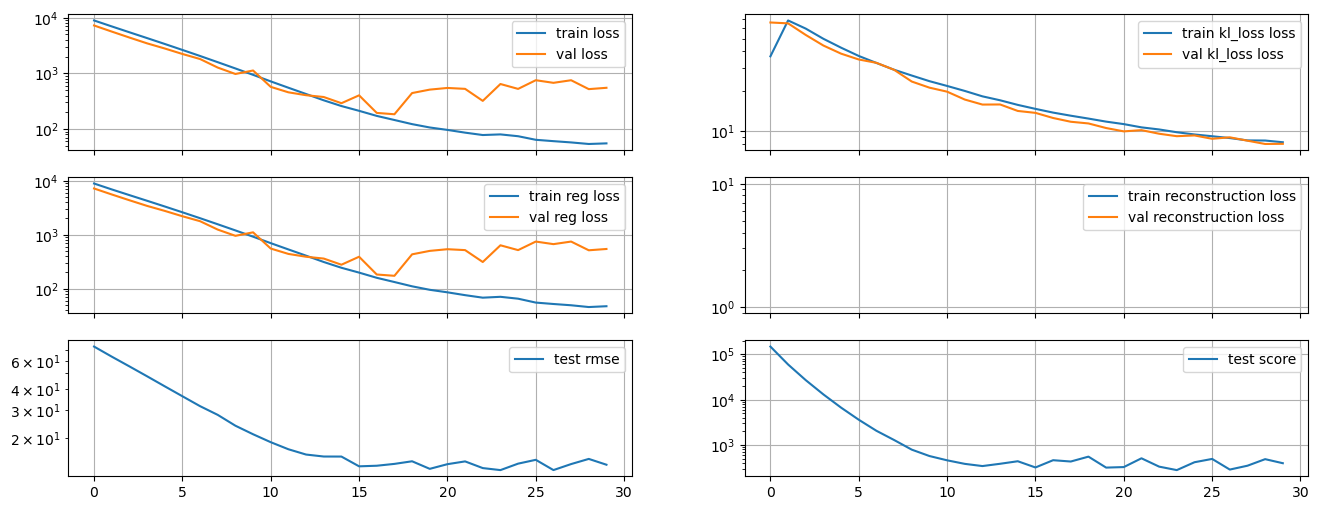

Epoch:30 
Train loss: 55.34 kl loss: 8.23 reg loss: 47.12 recon loss: 0.0
Valid loss: 549.88 kl loss: 8.0 reg loss: 541.88 recon loss: 0.0
Test:
     RMSE: 13.71      Score: 398.02
Best RMSE: 12.71 Best score: 280.6


In [266]:
sensors = [f's_{i}' for i in range(1,22)] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD003", sensors, reconstruct=False, lr=0.0004)
trainer.train(30)

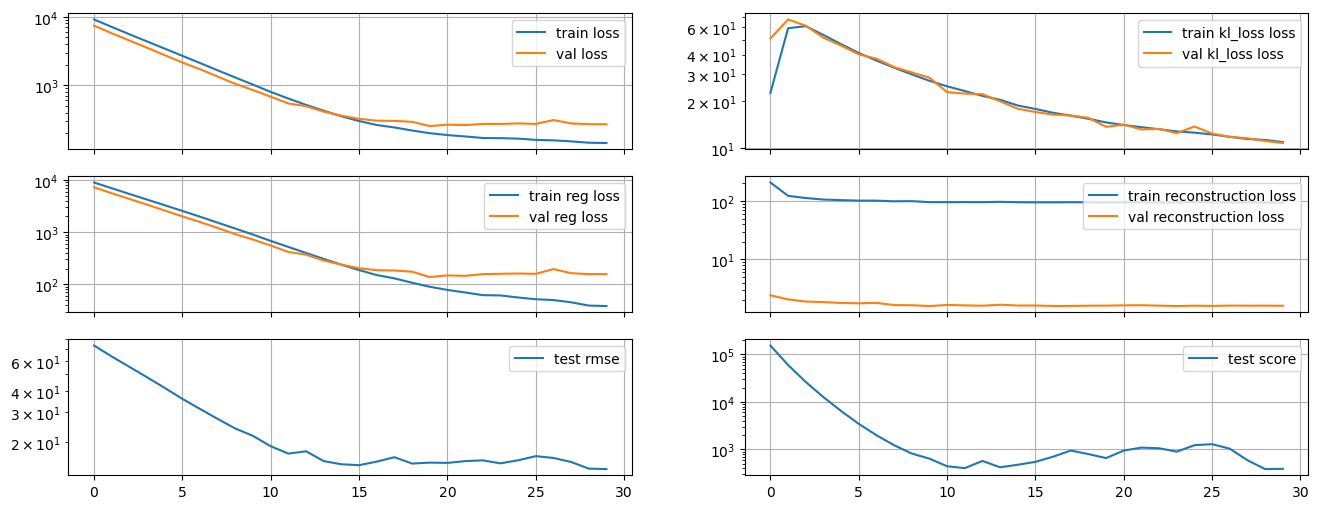

Epoch:30 
Train loss: 143.39 kl loss: 10.96 reg loss: 38.4 recon loss: 94.03
Valid loss: 269.58 kl loss: 10.82 reg loss: 157.35 recon loss: 1.61
Test:
     RMSE: 13.89      Score: 389.26
Best RMSE: 13.89 Best score: 384.34


In [264]:
sensors = [f's_{i}' for i in range(1,22)] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD003", sensors, reconstruct=True, lr=0.0004)
trainer.train(30)

In [ ]:
sensors = ['s_3', 's_4', 's_7', 's_10', 's_11', 's_12'] #FD002
sensors = ['s_3', 's_4', 's_7', 's_10', 's_11', 's_12'] #FD004

## FD002

In [ ]:
sensors = ['s_3', 's_4', 's_7', 's_10', 's_11', 's_12'] #FD002

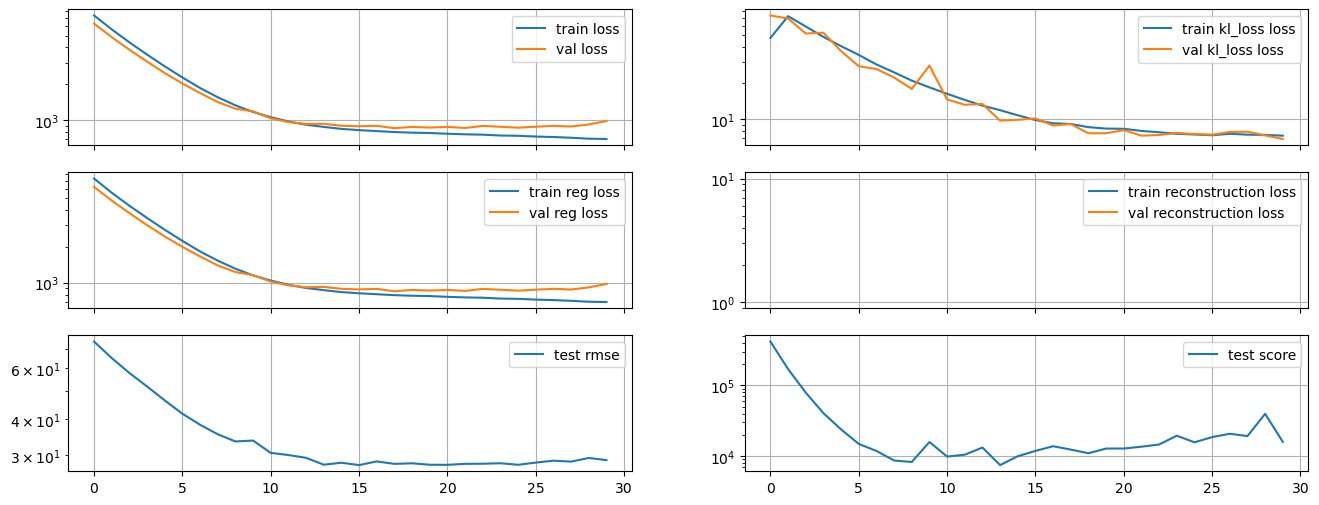

Epoch:30 
Train loss: 702.2 kl loss: 7.3 reg loss: 694.9 recon loss: 0.0
Valid loss: 986.99 kl loss: 6.85 reg loss: 980.14 recon loss: 0.0
Test:
     RMSE: 28.82      Score: 15878.91
Best RMSE: 27.7 Best score: 7456.74


In [271]:
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD002", sensors, reconstruct=False, lr=0.0002)
trainer.train(30)

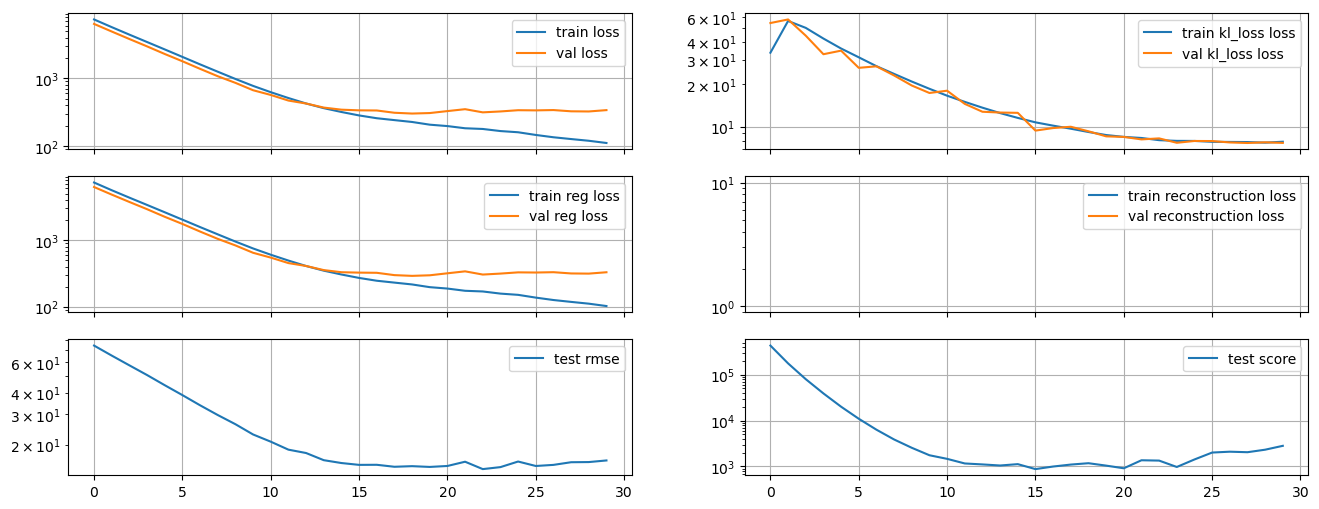

Epoch:30 
Train loss: 111.01 kl loss: 7.85 reg loss: 103.16 recon loss: 0.0
Valid loss: 339.09 kl loss: 7.7 reg loss: 331.39 recon loss: 0.0
Test:
     RMSE: 16.3      Score: 2813.66
Best RMSE: 14.53 Best score: 874.73


In [272]:
sensors = [f's_{i}' for i in range(1,22)] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD002", sensors, reconstruct=False, lr=0.0002)
trainer.train(30)

## FD004

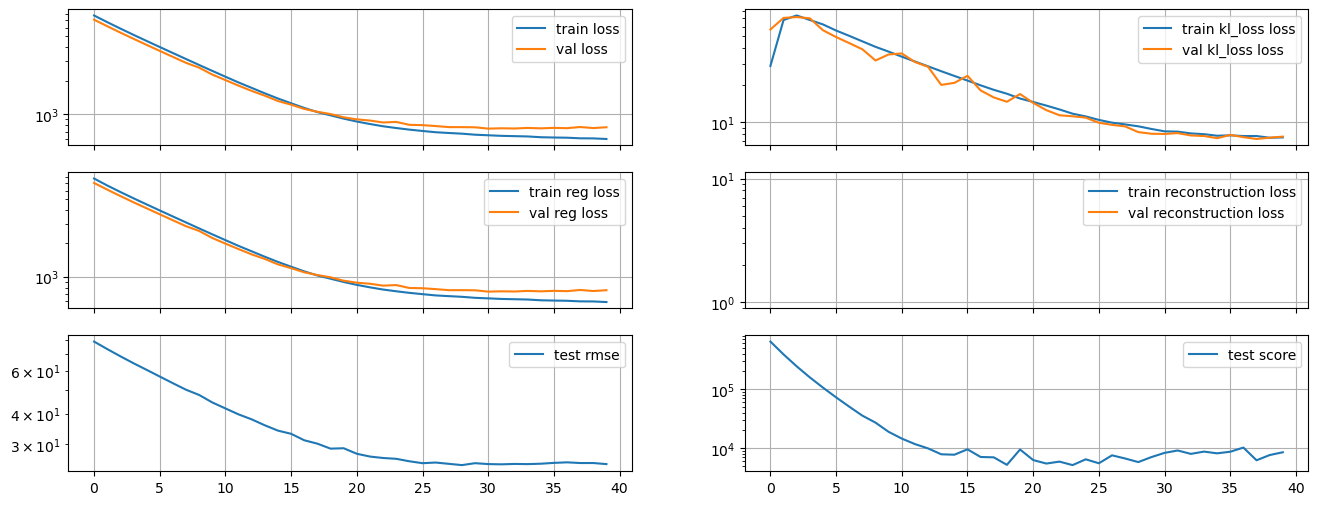

Epoch:40 
Train loss: 600.03 kl loss: 7.51 reg loss: 592.52 recon loss: 0.0
Valid loss: 765.13 kl loss: 7.63 reg loss: 757.5 recon loss: 0.0
Test:
     RMSE: 24.86      Score: 8467.05
Best RMSE: 24.63 Best score: 5122.94


In [278]:
sensors = ['s_3', 's_4', 's_7', 's_10', 's_11', 's_12'] #FD004
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD002", sensors, reconstruct=False, lr=0.0001)
trainer.train(40)

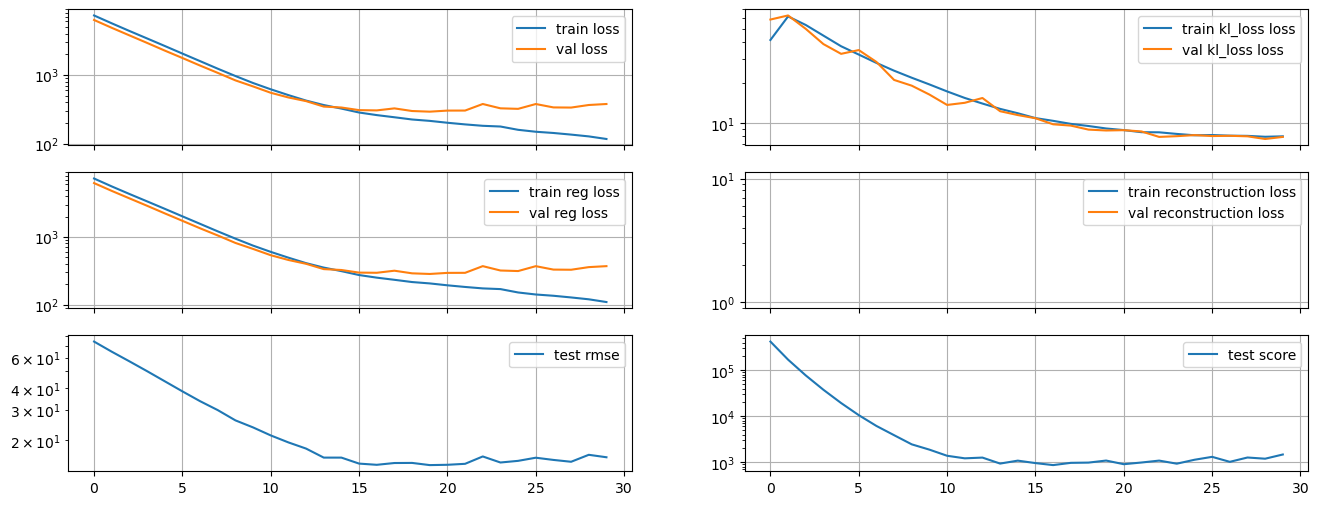

Epoch:30 
Train loss: 116.87 kl loss: 7.99 reg loss: 108.87 recon loss: 0.0
Valid loss: 377.38 kl loss: 7.91 reg loss: 369.46 recon loss: 0.0
Test:
     RMSE: 15.93      Score: 1475.62
Best RMSE: 14.35 Best score: 868.05


In [276]:
sensors = [f's_{i}' for i in range(1,22)] #FD001 FD003
trainer, x_train, y_train, x_val, y_val, x_test, y_test, train_loader, test_loader, val_loader = get_trainer("FD002", sensors, reconstruct=False, lr=0.0002)
trainer.train(30)